# Description of this program
## Read the oversampled data and then project the data in a new dimension. Used the projected data to train a ML model
## Verify security of the trained model by test data (project the test data by using different random matrices)
## #Test the model accuracy by attack data (user data whose profile are not used to train ML model)

In [1]:
#Read all data
import csv
import pandas as pd
dataset=pd.read_csv('Dataset/OversampledSwipeData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,Label
0,0.052478,0.277631,0.451259,0.718039,0.462785,0.0,0.0,0.018702,0.167556,-0.021220,...,-0.000286,0.006156,0.000038,0.098039,0.175416,0.183196,0.083857,0.007032,0.183644,0
1,0.052112,0.329417,0.456423,0.707689,0.431129,0.0,0.0,0.018824,0.188321,-0.046427,...,-0.001681,0.006563,0.000043,0.172549,0.161923,0.174437,0.012390,0.000154,0.172166,0
2,0.044798,0.246703,0.482247,0.682013,0.413386,0.0,0.0,0.023549,0.219466,-0.084152,...,-0.003980,0.007612,0.000058,0.172549,0.165296,0.176905,0.015824,0.000250,0.179818,0
3,0.050101,0.292016,0.470626,0.711022,0.418269,0.0,0.0,0.019350,0.182533,-0.089321,...,0.000438,0.009006,0.000081,0.149020,0.165296,0.178174,0.036672,0.001343,0.183644,0
4,0.048638,0.282665,0.438347,0.712347,0.447676,0.0,0.0,0.023968,0.151995,-0.024688,...,-0.001410,0.007316,0.000054,0.125490,0.175416,0.184353,0.061493,0.003786,0.183644,0


In [2]:
dataset.shape

(25800, 34)

In [3]:
#replace the user ID by class name and count the number of sample in each class
dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0     300
1     300
2     300
3     300
4     300
     ... 
81    300
82    300
83    300
84    300
85    300
Name: Label, Length: 86, dtype: int64

In [4]:
#seperate the profile in two groups (80.0%, 20.0%): (i) Training profile (0-155), and (ii) auxiliary profile (156-192)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] <68]
auxilaryData = dataset[dataset['Label'] >= 68]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))
#assigned 0-154 users' data to dataset
dataset=trainingData

Total user in training dataset: 68
Total user in auxiliary dataset: 18


In [5]:
#Prepare the traning data for training and testing the model
#import tensorflow
#from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

#Xtrain, Xtest= train_test_split(trainingData, test_size=0.2, random_state=22)
#Xtrain.groupby(['Label'])['Label'].count()

In [6]:
#total use in the system
totalUser= len(pd.unique(dataset['Label']))
trainingData=dataset
print("Total user in the training dataset:", len(pd.unique(trainingData['Label'])))

Total user in the training dataset: 68


In [7]:
#Prepare the traning data for training and testing the model
#import tensorflow
#from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

#Xtrain, Xtest= train_test_split(trainingData, test_size=0.2, random_state=22)
#Xtrain.groupby(['Label'])['Label'].count()


In [8]:
#random project the training data
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
trainDatasetRP = pd.DataFrame(columns=column1)
for seed in range(0,68):
    rng = np.random.RandomState(seed)
    X = trainingData[trainingData['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    trainDatasetRP = pd.concat([trainDatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(trainingData.shape)
print(trainDatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_32620\1304144744.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trainDatasetRP = pd.concat([trainDatasetRP, XRP], ignore_index=True)


(20400, 34)
(20400, 31)


In [9]:
#Prepare group 1 traning data for training and validate the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=trainDatasetRP.drop(columns=['Label'])
y=trainDatasetRP['Label']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=22)

#Xtest=testDatasetRP.drop(columns=['Label'])
#ytest=testDatasetRP['Label']

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [10]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(16320, 30)
(16320, 68)
(4080, 30)
(4080, 68)


In [11]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [12]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [13]:
def create_classifierRP(release=False, totalClass=68):
    classifier = Sequential()
    classifier.add(Dense(64, input_dim=30))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(Dropout(0.5))

    classifier.add(Dense(128))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(Dropout(0.2))

    #classifier.add(Dense(256))
    #classifier.add(BatchNormalization())
    #classifier.add(Activation('relu'))
    #classifier.add(Dropout(0.2))

    classifier.add(Dense(64))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(totalClass, activation='softmax'))


    classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(), metrics=['accuracy'])
    return classifier

Clasf=create_classifierRP()
Clasf.summary()

C:\Users\mdmor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 68)             │         4,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,004 (93.77 KB)

 Trainable params: 23,492 (91.77 KB)

 Non-trainable params: 512 (2.00 KB)

In [14]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
# callbacks_list = [learning_rate_reduction]

Classfier2= create_classifierRP(True,68)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=20, validation_data=(Xval, yval),verbose=1)

Epoch 1/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2588 - loss: 3.3667 - val_accuracy: 0.9966 - val_loss: 1.3900
Epoch 2/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8198 - loss: 1.0737 - val_accuracy: 0.9988 - val_loss: 0.0668
Epoch 3/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8927 - loss: 0.4927 - val_accuracy: 0.9988 - val_loss: 0.0112
Epoch 4/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.3317 - val_accuracy: 0.9990 - val_loss: 0.0051
Epoch 5/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9321 - loss: 0.2569 - val_accuracy: 0.9988 - val_loss: 0.0044
Epoch 6/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9352 - loss: 0.2219 - val_accuracy: 0.9988 - val_loss: 0.0041
Epoch 7/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9434 - loss: 0.1974 - val_accuracy: 0.9988 - val_loss: 0.0042
Epoch 8/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9492 - loss: 0.1806 - val_accuracy: 0.

Text(0.5, 0, 'epochs')

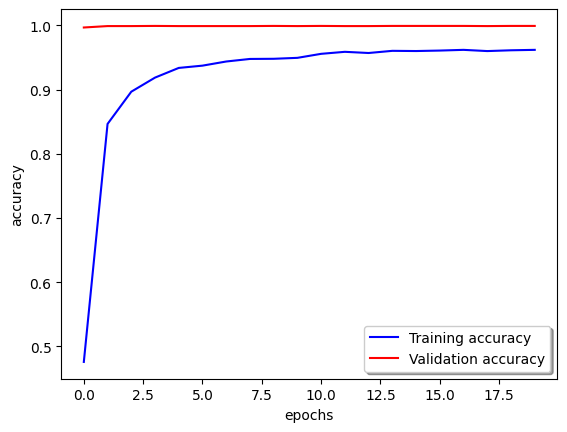

In [15]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

#Test by the data set that come from same user but different random matrix

In [16]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/SwipeDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 68]
#testdataset.head()

In [17]:
#random project the test data
import numpy as np
from sklearn.random_projection import SparseRandomProjection
column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
testDatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,68):
    rng = np.random.RandomState(seed+1)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testDatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_32620\570824540.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)


(1639, 34)
(1639, 31)


In [18]:
Xtest=testDatasetRP.drop(columns=['Label'])
ytest=testDatasetRP['Label']
ytest = to_categorical(ytest)

In [19]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 19.5018  
Loss: 19.87772560119629
Accuracy: 0.0


# Test by the attack data

In [20]:
#invalid test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/SwipeDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] >= 68]
newID = np.random.randint(0, 68, size=testdataset.shape[0])
testdataset['Label'] = newID
testdataset.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,Label
8796,0.013165,0.510668,0.732085,0.775555,0.716926,0.027529,0.024510,0.119330,0.654402,-0.149844,...,-0.048378,0.018561,0.000345,1.000000,0.860215,0.943739,0.00000,0.000000,0.97561,20
8209,0.036204,0.510668,0.681730,0.917961,0.661678,0.524333,0.333333,-0.000003,0.307162,-0.126702,...,-0.013927,0.026554,0.000705,0.180392,0.452035,0.276953,0.37244,0.138711,0.18747,28
8721,0.051381,0.223365,0.423734,0.417552,0.431169,0.000000,0.000000,0.013251,0.142010,-0.062371,...,0.002469,0.013271,0.000176,1.000000,0.860215,0.943739,0.00000,0.000000,0.97561,7
8875,0.016639,0.498441,0.925113,0.880265,0.908020,0.023247,0.031863,0.066555,0.697454,-0.141167,...,-0.034539,0.022292,0.000497,1.000000,0.860215,0.943739,0.00000,0.000000,0.97561,9
9294,0.029256,0.412619,0.587617,0.740061,0.507532,0.051660,0.039216,0.000593,0.386902,-0.345556,...,0.003056,0.070412,0.004958,1.000000,0.860215,0.943739,0.00000,0.000000,0.97561,27


In [21]:
#random project the test data
import numpy as np
from sklearn.random_projection import SparseRandomProjection
column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
testDatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,68):
    rng = np.random.RandomState(seed+1)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testDatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_32620\570824540.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)


(425, 34)
(425, 31)


In [22]:
Xtest=testDatasetRP.drop(columns=['Label'])
ytest=testDatasetRP['Label']
ytest = to_categorical(ytest)

In [23]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 24.4437  
Loss: 22.515335083007812
Accuracy: 0.0
